### Importing required packages

In [1]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
import seaborn as sb

In [2]:
# https://huggingface.co/datasets/scikit-learn/iris
# Loading the dataset
ROOT = Path("__file__").resolve().parent.parent 
IRIS_DATA = ROOT / "dataset/Iris.csv"
df = pd.read_csv(IRIS_DATA)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### We can see that there are no null values present in the dataset, rendering it suitable for analysis without any worries about data gaps.

In [4]:
# Checking column datatypes and other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### The dataset consists of the three species of flowers namely: iris-setosa, iris-versicolor, iris-virginica and their different properties like the Petal Length and Width, and Sepal Length and Width in cm.

In [5]:
# Getting dataframe summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Plotting count of different species

In [6]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

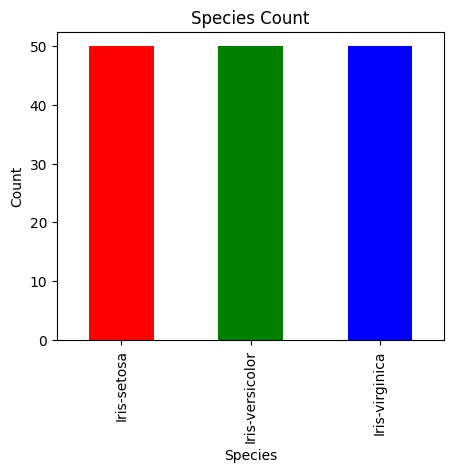

In [7]:
plt.figure(figsize=(5, 4))
df["Species"].value_counts().sort_index().plot.bar(color=["red", "green", "blue"])
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Species Count")
plt.show()

## The dataset consists of 150 records of each species of flower and is evenly distributed among all species

### Comparing properties of flowers

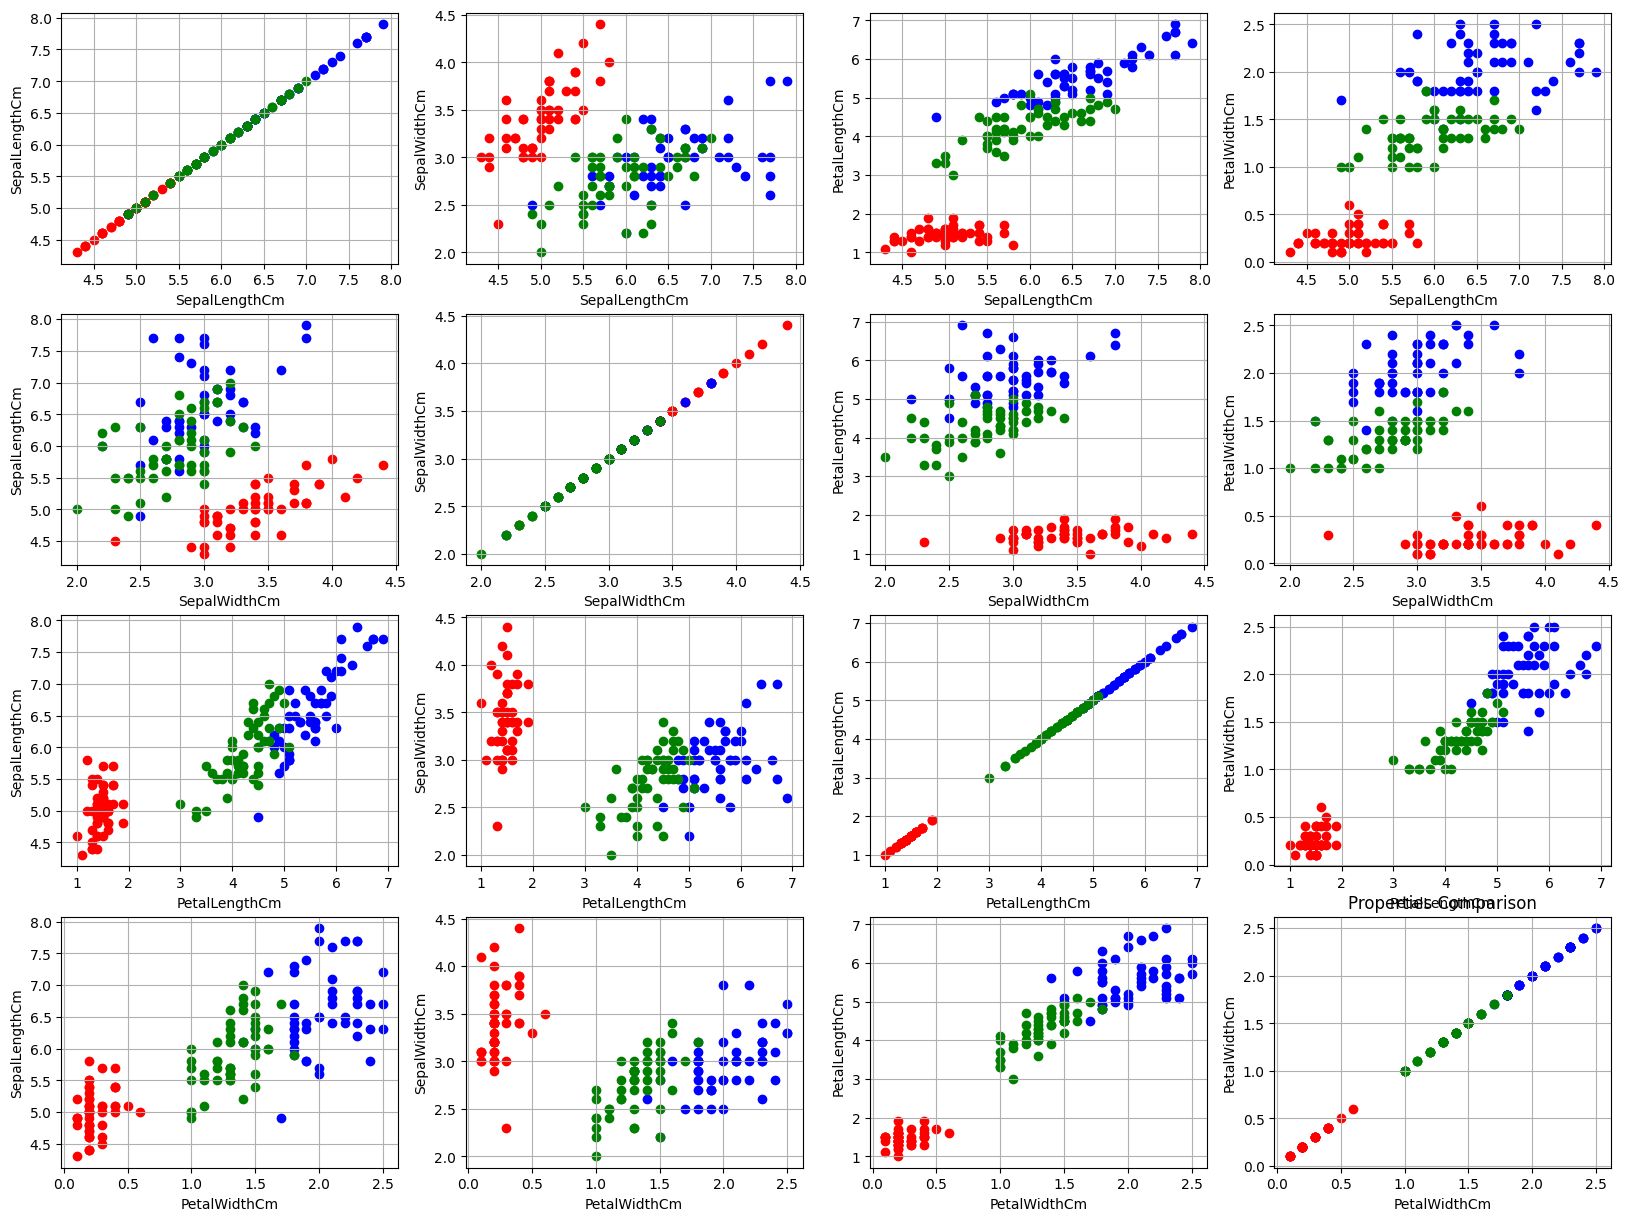

In [8]:
properties = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
setosa = df[df['Species'] == "Iris-setosa"][properties]
virginica = df[df['Species'] == "Iris-virginica"][properties]
versicolor = df[df['Species'] == "Iris-versicolor"][properties]

plt.figure(figsize=(20, 15))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4, 4, (i * 4) + (j + 1))
        plt.scatter(setosa[properties[i]], setosa[properties[j]], color='r')
        plt.scatter(virginica[properties[i]], virginica[properties[j]], color='b')
        plt.scatter(versicolor[properties[i]], versicolor[properties[j]], color='g')
        plt.xlabel(properties[i])
        plt.ylabel(properties[j])
        plt.grid(True)
plt.title("Properties Comparison")
plt.show()

#### Sepal Length vs. Sepal Width (Top Left Plot):

Iris-setosa generally has shorter sepal lengths but slightly wider sepals compared to the other two species.
Iris-virginica and Iris-versicolor exhibit more overlap in this property.

#### Sepal Length vs. Petal Length (Top Right Plot):

Iris-setosa has significantly shorter sepal and petal lengths compared to the other species.
Iris-virginica tends to have longer sepals and petals compared to Iris-versicolor.


#### Sepal Length vs. Petal Width (Bottom Left Plot):

Iris-setosa has shorter sepals and narrower petals.
Iris-virginica generally has longer sepals and wider petals.
Iris-versicolor falls between the other two species in terms of sepal length and petal width.

#### Sepal Width vs. Petal Length (Bottom Right Plot):

Iris-setosa has relatively wider sepals and shorter petals.
Iris-virginica exhibits longer petals and similar sepal widths.
Iris-versicolor shows moderate values for both sepal width and petal length.

### Correlation Matrix

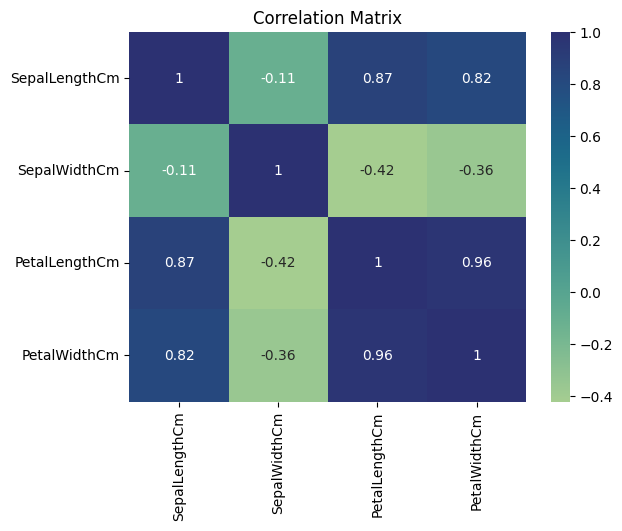

In [9]:
corr_mat = df[properties].corr()
plt.figure()
sb.heatmap(corr_mat, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

#### Positive Correlations:

There is a strong positive correlation between Sepal Length and Petal Length, indicating that an increase in one variable tends to correspond with an increase in the other.
A noticeable positive correlation is also observed between Sepal Length and Petal Width, although it appears slightly weaker compared to the first pair.
Petal Length and Petal Width exhibit a very strong positive correlation, suggesting that an increase in one of these properties significantly corresponds to an increase in the other.

#### Negative Correlation:

Interestingly, no strong negative correlations are found among these properties. The heatmap consistently displays light colors for negative correlations, implying that these selected properties do not tend to move in opposite directions.

#### Weak or No Correlations:

Sepal Length and Sepal Width display a relatively weak positive correlation, characterized by a lighter shade on the heatmap. The correlation coefficient between these two properties is not very high.
Similarly, Sepal Width and Petal Length, as well as Sepal Width and Petal Width, show minimal correlation, as evidenced by the light colors on the heatmap.

In summary, the correlation matrix heatmap reveals distinct patterns in the relationships between the iris flower properties. Notably, it emphasizes strong positive correlations between Petal Length and Petal Width, as well as between Sepal Length and Petal Length. These insights can be valuable for tasks such as feature selection, model development, and gaining a deeper understanding of how these properties are interrelated within the dataset.

### Converting target column species from string to integer values

In [10]:
# Mapping species from string to int as the model we are using only understand numerical data
species = {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}
df["SpeciesInteger"] = df["Species"].apply(lambda x: species[x])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesInteger
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Boxplot

/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.

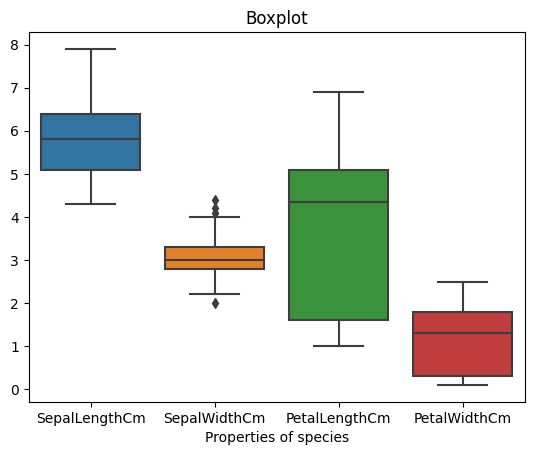

In [11]:
plt.figure()
sb.boxplot(df[properties])
plt.xlabel("Properties of species")
plt.title("Boxplot")
plt.show()

#### Central Tendency:

Inside each box, you'll find a horizontal line representing the median (50th percentile) for each property and species. This median value serves as a central reference point indicating where the data tends to cluster.

#### Spread and Variability:

The boxes themselves in the plot illustrate the interquartile range (IQR), which encompasses the middle 50% of the data. The height of these boxes provides insight into the range of values within this IQR.
The upper and lower boundaries of the boxes denote the third quartile (Q3) and first quartile (Q1), respectively. When the box is taller, it suggests that the data exhibits greater variability.

#### Outliers:

Any individual data points that extend beyond the "whiskers" (the lines that extend from the boxes) are considered potential outliers. These outliers are individually marked in the plot.
The presence of outliers may signify exceptional or uncommon values within the dataset.
Comparison Across Properties and Species:

The box plot serves as a tool for a straightforward comparison of how each property is distributed among the various species of iris flowers.
It enables the identification of differences in median values, the spread of data, and the potential presence of outliers across the four properties and the three distinct species.

#### Distribution Shape:

The shape of the box plot can provide insights into the underlying data distribution. For example, a wider box and longer whiskers may indicate a more dispersed or spread-out distribution, while a narrow box with short whiskers suggests a more concentrated or tightly clustered distribution.

These observations collectively offer a valuable understanding of the distributional characteristics of the data, including its central tendency, variability, presence of outliers, and how these attributes differ across properties and species.

/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhaven_naik/Downloads/dev/transformers-course/.env/lib/python3.9/site-packages/seaborn/_oldcore.

<Figure size 640x480 with 0 Axes>

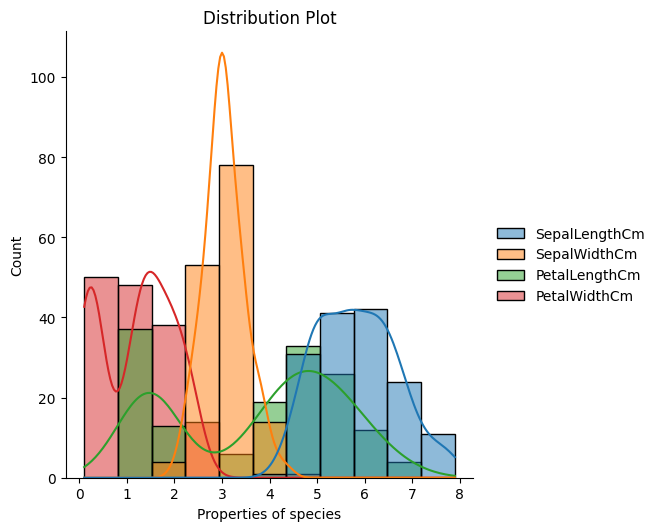

In [12]:
plt.figure()
sb.displot(df[properties], kde=True)
plt.xlabel("Properties of species")
plt.title("Distribution Plot")
plt.show()

Plotting different types of plots helps us visualize the data in unique ways to gain deeper insights into the distribution of the data.

### Training a Decision Tree Classifier

In [13]:
# Dividing data into labels and features
X = df[properties]
y = df["SpeciesInteger"]

# Splitting data intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Declaring the sklearn Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fitting the model to our data
tree_model = classifier.fit(X_train, y_train)

### Plotting the tree

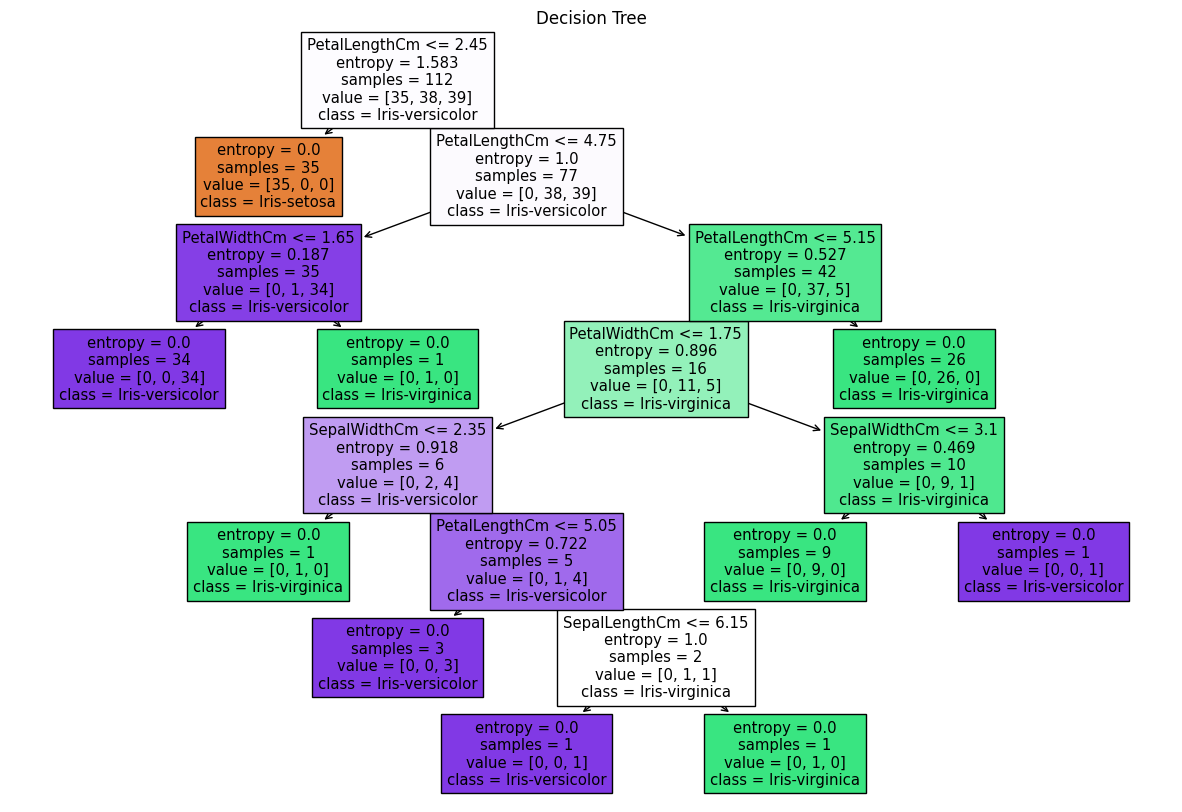

In [15]:
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=properties, class_names=["Iris-setosa","Iris-virginica", "Iris-versicolor"], filled=True)
plt.title("Decision Tree")
plt.show()

Through the utilization of entropy and Information Gain as fundamental principles, the decision tree classifier employing the entropy criterion seeks to construct a tree-like structure that effectively divides the dataset into groups with similar characteristics. This process ultimately facilitates precise and efficient classification of Iris species. It's noteworthy that this approach represents a widely adopted technique among decision tree classifiers due to its effectiveness in both selecting relevant features and partitioning data for classification purposes.

### Plotting the confusion matrix

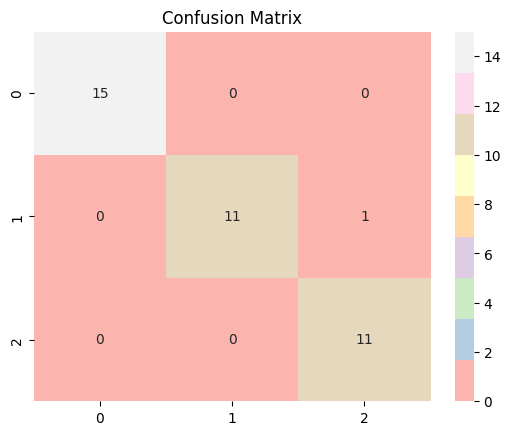

In [16]:
prediction = tree_model.predict(X_test)
cf_mat = confusion_matrix(y_test, prediction)
plt.figure()
sb.heatmap(cf_mat, annot=True, cmap="Pastel1")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix aids in evaluating the performance of the decision tree classifier.

The heatmap offers an intuitive representation of the model's performance in classifying test data, highlighting both correct and incorrect classifications. This visualization is valuable for assessing the model's accuracy and identifying potential areas for enhancement in the classification task.

Based on the earlier mapping species = {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}
The above confusion matrix shows that the classifier is correctly able to classify 15 Iris-setosa correctly(True Positives or TP), 11 of each Iris-virginica and Iris-versicolor correctly (TP), and identifies 1 Iris-versicolor is fasely identified as Iris-virginica.